# MNIST 손글씨 - CNN v1
- 2 x Conv2D layers
- 1 FCN layer
- 1 Output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [7]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# X_train, X_test 정규화(0~1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    Flatten(),    # FCN 적용을 위해 1차원으로 변환
                    Dense(512, activation='relu'),
                    Dense(10, activation='softmax')
                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 512)               18874880  
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
model_path = 'best_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200, callbacks=[mc, es])

Epoch 1/100
239/240 [============================>.] - ETA: 0s - loss: 0.1523 - accuracy: 0.9532
Epoch 1: val_loss improved from inf to 0.05629, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 17s 23ms/step - loss: 0.1520 - accuracy: 0.9532 - val_loss: 0.0563 - val_accuracy: 0.9837
Epoch 2/100
238/240 [============================>.] - ETA: 0s - loss: 0.0356 - accuracy: 0.9890
Epoch 2: val_loss improved from 0.05629 to 0.05414, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 5s 23ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0541 - val_accuracy: 0.9854
Epoch 3/100
238/240 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9944
Epoch 3: val_loss improved from 0.05414 to 0.04554, saving model to best_mnist_cnn_v1.h5
240/240 [==============================] - 6s 23ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 4/100
238/240 [============================

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9872


[0.04070865362882614, 0.9872000217437744]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

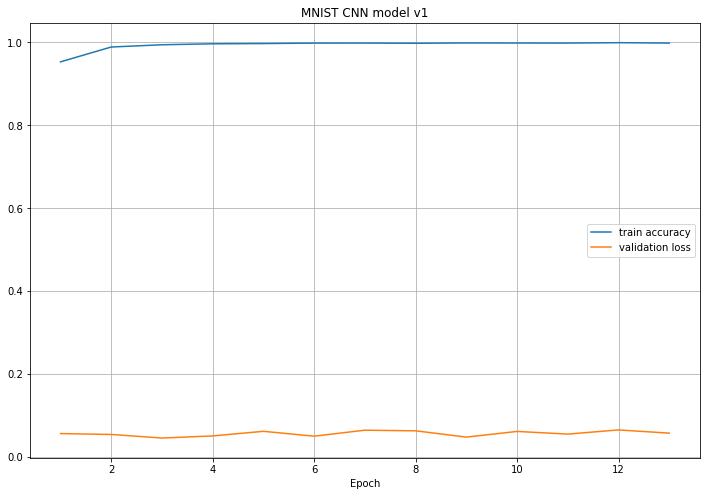

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v1')
plt.show()